In [2]:
!KAGGLE_CONFIG_DIR="/content/" kaggle datasets download -d atulanandjha/lfwpeople

 97% 226M/232M [00:02<00:00, 93.2MB/s]
100% 232M/232M [00:02<00:00, 82.3MB/s]


In [3]:
!mkdir data
!unzip lfwpeople.zip -d data
!rm lfwpeople.zip
!mkdir data/people
!tar lxvf data/lfw-funneled.tgz -C data/people
!rm data/lfw-funneled.tgz
!mkdir -p haar
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface_extended.xml -P haar
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml -P haar

Streaming output truncated to the last 5000 lines.
lfw_funneled/Edward_Egan/
lfw_funneled/Edward_Egan/Edward_Egan_0001.jpg
lfw_funneled/Pat_DAmuro/
lfw_funneled/Pat_DAmuro/Pat_DAmuro_0001.jpg
lfw_funneled/Demi_Moore/
lfw_funneled/Demi_Moore/Demi_Moore_0001.jpg
lfw_funneled/Demi_Moore/Demi_Moore_0002.jpg
lfw_funneled/Demi_Moore/Demi_Moore_0003.jpg
lfw_funneled/Demi_Moore/Demi_Moore_0004.jpg
lfw_funneled/Jamie_King/
lfw_funneled/Jamie_King/Jamie_King_0001.jpg
lfw_funneled/Joseph_Galante/
lfw_funneled/Joseph_Galante/Joseph_Galante_0001.jpg
lfw_funneled/Kenneth_Brill/
lfw_funneled/Kenneth_Brill/Kenneth_Brill_0001.jpg
lfw_funneled/Noel_Forgeard/
lfw_funneled/Noel_Forgeard/Noel_Forgeard_0001.jpg
lfw_funneled/Akbar_Al_Baker/
lfw_funneled/Akbar_Al_Baker/Akbar_Al_Baker_0001.jpg
lfw_funneled/Gregg_Berhalter/
lfw_funneled/Gregg_Berhalter/Gregg_Berhalter_0001.jpg
lfw_funneled/Tuncay_Sanli/
lfw_funneled/Tuncay_Sanli/Tuncay_Sanli_0001.jpg
lfw_funneled/Lou_Reed/
lfw_funneled/Lou_Reed/Lou_Reed_0001.jp

In [11]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml -P haar

--2023-05-24 22:58:46--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘haar/haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.02s   

2023-05-24 22:58:46 (27.5 MB/s) - ‘haar/haarcascade_frontalface_alt.xml’ saved [676709/676709]



In [4]:
!find data/people/lfw_funneled -maxdepth 1 -type f

data/people/lfw_funneled/pairs_01.txt
data/people/lfw_funneled/pairs_08.txt
data/people/lfw_funneled/pairs.txt
data/people/lfw_funneled/pairs_04.txt
data/people/lfw_funneled/pairs_05.txt
data/people/lfw_funneled/pairs_10.txt
data/people/lfw_funneled/pairs_06.txt
data/people/lfw_funneled/pairs_02.txt
data/people/lfw_funneled/pairs_09.txt
data/people/lfw_funneled/pairs_03.txt
data/people/lfw_funneled/pairs_07.txt


In [5]:
!ls -l "data/people/lfw_funneled/" | head -n 4

total 23656
drwxr-xr-x 2 25112 users   4096 Nov 15  2007 Aaron_Eckhart
drwxr-xr-x 2 25112 users   4096 Nov 15  2007 Aaron_Guiel
drwxr-xr-x 2 25112 users   4096 Nov 15  2007 Aaron_Patterson


In [ ]:
!ls -la "data/people/lfw_funneled/George_W_Bush/"

In [14]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import os
import numpy as np
from tqdm import tqdm

In [15]:
PEOPLE_FACES_PATH = "data/people/lfw_funneled/"
HAAR_CASCADE_FACE = "haar/haarcascade_frontalface_alt.xml"
TRAIN_DIR = "data/people/lfw_funneled"

In [16]:
haar_cascade = cv.CascadeClassifier(HAAR_CASCADE_FACE)

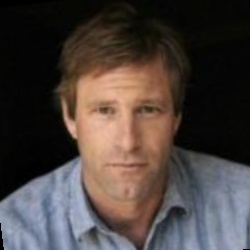

In [17]:
image = cv.imread(
    os.path.join(PEOPLE_FACES_PATH, "Aaron_Eckhart/Aaron_Eckhart_0001.jpg")
)
cv2_imshow(image)

In [18]:
def list_directories(folder_path):
    directories = []
    for root, dirs, files in os.walk(folder_path):
        directories.extend(dirs)
        break  # Only list directories in the top-level folder
    return directories

In [19]:
features = []
labels = []

In [26]:
directories = list_directories(PEOPLE_FACES_PATH)
indexes = np.arange(len(directories))
random_indexes = indexes.copy()
np.random.shuffle(random_indexes)
random_indexes = random_indexes[:100]

In [36]:
def create_train_dataset(directories, indexes):
  progress_bar = tqdm(total=len(indexes), desc="Processing directories", unit="dir", position=0, leave=True)
  for index in indexes:
    person = directories[index]
    path = os.path.join(TRAIN_DIR, person)
    label = index

    for img in os.listdir(path):
      img_path = os.path.join(path, img)
      img_array = cv.imread(img_path)
      if img_array is None:
        continue
      gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
      faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

      face_detected = False
      for (x,y, w,h) in faces_rect:
        if not face_detected:
          faces_roi = gray[y:y+h, x:x+w]
          features.append(faces_roi)
          labels.append(label)
          face_detected=True
    progress_bar.update(1)
  progress_bar.close()

In [37]:
create_train_dataset(directories,random_indexes)

Processing directories: 100%|██████████| 100/100 [00:14<00:00,  6.93dir/s]


In [39]:
features = np.array(features, dtype='object')
labels = np.array(labels)

In [41]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [48]:
face_recognizer.train(features, labels)

In [49]:
face_recognizer.save("face_trained.yml")

In [51]:
np.save('features.npy', features)
np.save('labels.npy', labels)

In [52]:
haar_model = cv.CascadeClassifier('haar_face.xml')

In [53]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

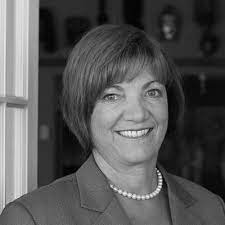

In [73]:
img = cv.imread(r'shella.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

Label = Sheila_Copps with a confidence of 99.16681368123469


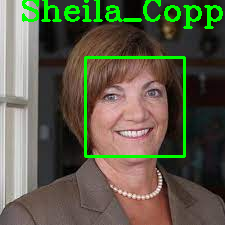

In [74]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h,x:x+w]
    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {directories[label]} with a confidence of {confidence}')

    cv.putText(img, str(directories[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
cv2_imshow(img)